In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from ReinforcementAgent import ReinforcementAgent
from Game_Reinforcement import Game

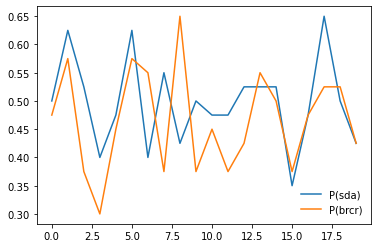

In [6]:
payOffLeft = [  [ [1,0], [0,1]] ,     
                [ [0,1], [0,1]] ]

payOffRight = [  [ [0,1], [0,1]] ,     
                [ [0,1], [1,0]] ]

sda = ['A', 'B']
brcr = ['B', 'A']

p = 0.5
list1 = []
list2 = []
p1 = ReinforcementAgent(informed = True, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p,propensityA = 1,propensityB = 1)

p2 = ReinforcementAgent(informed = False, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p, propensityA = 1,propensityB = 1)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 20
av_payOff = []
avpsda = []
avpbrcr = []
for ep in range(episodes):
    payoffs = []
    psda = 0
    pbrcr = 0
    for i in range(rounds):
        
        p, p1action, p2action, selected = game.play_round()
        p1.update_propensity(payoff = p, action_by_player = p1action)
        p2.update_propensity(payoff = p, action_by_player = p2action)

            
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda+=1
        if(p2action == brcr[selected]):
            pbrcr+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
    avpsda.append(psda/rounds)
    avpbrcr.append(pbrcr/rounds)

plt.plot(avpsda, label = "P(sda)")
plt.plot(avpbrcr, label = "P(brcr)")
plt.legend(frameon=False)


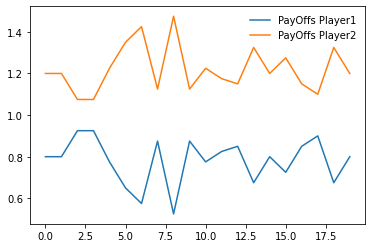

In [7]:
av_payOff = np.array(av_payOff)
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)

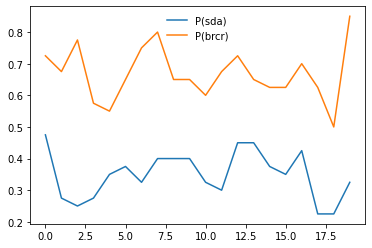

In [8]:
p = 0.34

p1 = ReinforcementAgent(informed = True, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p,propensityA = 1,propensityB = 1)

p2 = ReinforcementAgent(informed = False, payoffMatrixLeft = payOffLeft, payOffMatrixRight = payOffRight,
                sda = sda, p = p, propensityA = 1,propensityB = 1)

game = Game(payOffRight = payOffRight, payOffLeft = payOffLeft, p = p, p1 = p1, p2 = p2)

rounds = 40
payoffs = []

episodes = 20
av_payOff = []
avpsda = []
avpbrcr = []
for ep in range(episodes):
    payoffs = []
    psda = 0
    pbrcr = 0
    for i in range(rounds):
    
        p, p1action, p2action, selected = game.play_round()
        p1.update_propensity(payoff = p, action_by_player = p1action)
        p2.update_propensity(payoff = p, action_by_player = p2action)
            
        payoffs.append(p)
        if(p1action == sda[selected]):
            psda+=1
        if(p2action == brcr[selected]):
            pbrcr+=1
    
    payoffs = np.array(payoffs)
    av_payOff.append(np.average(payoffs, axis = 0))
    avpsda.append(psda/rounds)
    avpbrcr.append(pbrcr/rounds)

#plt.plot(av_payOff)
plt.plot(avpsda, label = "P(sda)")
plt.plot(avpbrcr, label = "P(brcr)")
plt.legend(frameon=False)


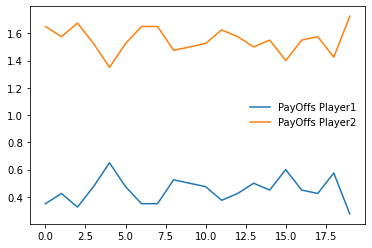

In [9]:
av_payOff = np.array(av_payOff)
plt.plot(av_payOff[:,0], label = "PayOffs Player1")
plt.plot(av_payOff[:,1], label = "PayOffs Player2")

plt.legend(frameon=False)